In [ ]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121

from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install Augmentor

In [ ]:
# # augmentation

# import Augmentor
# def augment(class_name,size):

#     p = Augmentor.Pipeline(f"/content/drive/MyDrive/datasetForML/Merge/train/{class_name}")

#     # Add operations
#     p.flip_left_right(probability=0.5)
#     p.flip_top_bottom(probability=0.5)
#     p.rotate90(probability=0.5)
#     p.rotate180(probability=0.5)
#     p.rotate270(probability=0.5)
#     # Execute the pipeline
#     p.sample(size)  # Augment 100 images


In [ ]:
# for i,j in zip(classess,sizes):
#   augment(i,j)


In [ ]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(225,225,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

# for layer in conv_base.layers:
  # print(layer.name,layer.trainable)

In [ ]:
conv_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 225, 225, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 231, 231, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 113, 113, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 113, 113, 64)         256       ['conv1/conv[0][0]']

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8,activation='softmax'))

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/datasetForML/Merge/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(225,225),
    seed = 42,
    color_mode = 'rgb',
    validation_split = 0.2,
    subset= 'training'
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/datasetForML/Merge/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(225,225),
    seed = 123,
    color_mode = 'rgb',
    validation_split = 0.2,
    subset = 'validation'
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/datasetForML/Merge/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(225,225),
    seed = 145,
    color_mode = 'rgb',
    shuffle=True
    # validation_split = 0.2
)

Found 10087 files belonging to 11 classes.
Using 8070 files for training.
Found 10087 files belonging to 11 classes.
Using 2017 files for validation.
Found 935 files belonging to 11 classes.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
253/253 [==============================] - 99s 332ms/step - loss: 0.8647 - accuracy: 0.6916 - val_loss: 0.4306 - val_accuracy: 0.8488
Epoch 2/10
253/253 [==============================] - 90s 348ms/step - loss: 0.3306 - accuracy: 0.8748 - val_loss: 0.2674 - val_accuracy: 0.9023
Epoch 3/10
253/253 [==============================] - 82s 317ms/step - loss: 0.2162 - accuracy: 0.9204 - val_loss: 0.2336 - val_accuracy: 0.9073
Epoch 4/10
253/253 [==============================] - 77s 292ms/step - loss: 0.1539 - accuracy: 0.9462 - val_loss: 0.1613 - val_accuracy: 0.9415
Epoch 5/10
253/253 [==============================] - 80s 311ms/step - loss: 0.1154 - accuracy: 0.9620 - val_loss: 0.1989 - val_accuracy: 0.9217
Epoch 6/10
253/253 [==============================] - 118s 313ms/step - loss: 0.0879 - accuracy: 0.9732 - val_loss: 0.1140 - val_accuracy: 0.9613
Epoch 7/10
253/253 [==============================] - 75s 290ms/step - loss: 0.0688 - accuracy: 0.9823 - val_loss: 0.0923 - val_a

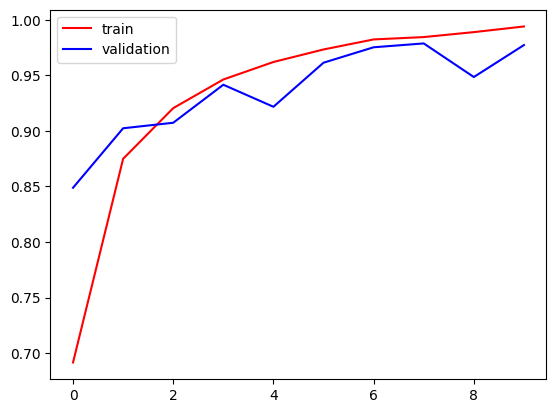

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

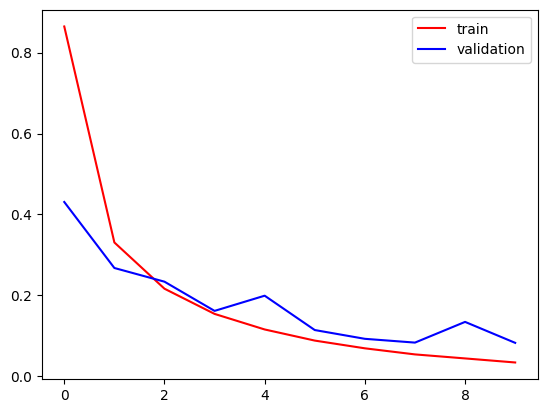

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Extract features (x) and labels (y) from the dataset
X, y = [], []
for images, labels in test_ds:
    X.append(images)
    y.append(labels)

# Concatenate features and labels
X = tf.concat(X, axis=0)
y = tf.concat(y, axis=0)

# Now you have x (features) and y (labels)

30/30 [==============================] - 3s 94ms/step


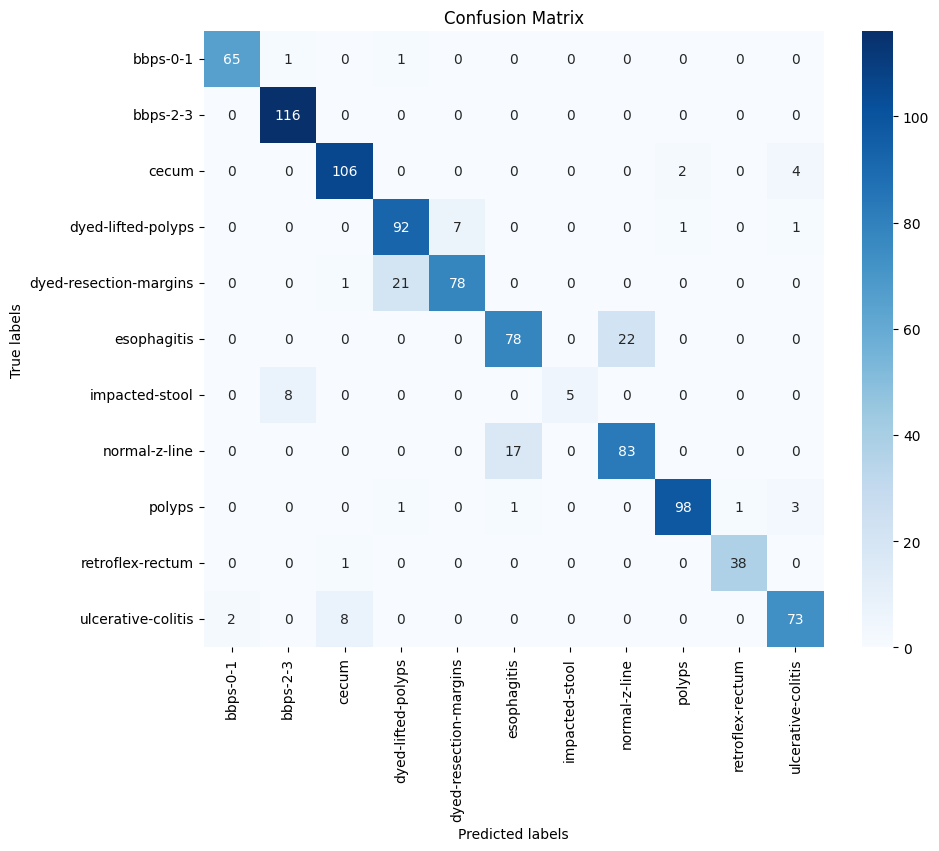

Classification Report:
                        precision    recall  f1-score   support

              bbps-0-1       0.97      0.97      0.97        67
              bbps-2-3       0.93      1.00      0.96       116
                 cecum       0.91      0.95      0.93       112
    dyed-lifted-polyps       0.80      0.91      0.85       101
dyed-resection-margins       0.92      0.78      0.84       100
           esophagitis       0.81      0.78      0.80       100
        impacted-stool       1.00      0.38      0.56        13
         normal-z-line       0.79      0.83      0.81       100
                polyps       0.97      0.94      0.96       104
      retroflex-rectum       0.97      0.97      0.97        39
    ulcerative-colitis       0.90      0.88      0.89        83

              accuracy                           0.89       935
             macro avg       0.91      0.85      0.87       935
          weighted avg       0.89      0.89      0.89       935



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Tensorflow tensors to numpy arrays
X_np = X.numpy()
y_np = y.numpy()

# Assuming you have already trained your model and got predictions
# Replace this with your model's prediction logic
# For example, predictions = model.predict(X_np)

# Example predictions (replace with your actual predictions)
predictions = model.predict(X)
predictions = np.argmax(predictions, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_np, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print("Classification Report:")
print(classification_report(y_np, predictions, target_names=class_names))


In [ ]:
loss, accuracy = model.evaluate(X_np, y_np)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

30/30 [==============================] - 3s 100ms/step - loss: 0.3291 - accuracy: 0.8898
Test Loss: 0.32913917303085327
Test Accuracy: 0.8898395895957947
